In [ ]:
## Si no tienes las librerías las instalamos (Te recomiendo crear un ambiente separado)
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

In [8]:
## Normalmente importamos todas las librerías que usamos en la primera celda
## Para efectos pedagógicos las volveremos a citar en el resto del código.
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, recall_score,f1_score



### Vamos a analizar el spam de mails usando este [dataset](https://www.kaggle.com/datasets/jackksoncsie/spam-email-dataset/code) de Kaggle.

In [11]:
### Si descargaste los datos localmente
import pandas as pd
data = pd.read_csv('emails.csv')
data

FileNotFoundError: [Errno 2] No such file or directory: 'emails.csv'

In [15]:
import kagglehub
import os

path = kagglehub.dataset_download("jackksoncsie/spam-email-dataset")

file_path = os.path.join(path, "emails.csv")
data = pd.read_csv(file_path)

data.head()

Using Colab cache for faster access to the 'spam-email-dataset' dataset.


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


### Para entrenar un modelo de ML con un solo dataset, vamos a separar el dataset en dos subconjuntos: Set de prueba y de entrenamiento (Train and Test)

In [13]:
## Primero lo que hacemos es separar el dataset en Features (X) y Label (Y)

X = data['text']
Y = data['spam']

print('**************************************************************************')
print('Este es el vector X que corresponde al texto del correo')
print(X)
print('**************************************************************************')
print('Este es el vector Y que corresponde a las etiquetas del correo: ham o spam')
print(Y)


**************************************************************************
Este es el vector X que corresponde al texto del correo
0       Subject: naturally irresistible your corporate...
1       Subject: the stock trading gunslinger  fanny i...
2       Subject: unbelievable new homes made easy  im ...
3       Subject: 4 color printing special  request add...
4       Subject: do not have money , get software cds ...
                              ...                        
5723    Subject: re : research and development charges...
5724    Subject: re : receipts from visit  jim ,  than...
5725    Subject: re : enron case study update  wow ! a...
5726    Subject: re : interest  david ,  please , call...
5727    Subject: news : aurora 5 . 2 update  aurora ve...
Name: text, Length: 5728, dtype: object
**************************************************************************
Este es el vector Y que corresponde a las etiquetas del correo: ham o spam
0       1
1       1
2       1
3       1
4

##### Tenemos Un problema: Los clasificadores reciben como Input enteros, y la columna data['text'] corresponde a datos en formato strings (Object en Pandas).

##### Por suerte tenemos una forma de convertir strings a números que es vectorizándolos. La explicación de ello se escapa del Scope del curso, por lo que vamos a aplicarlo directamente a la columna X. En resumen, lo que haremos es convertir al vector de texto en una matriz que simbolizará cada palabra del string con un valor numérico.

In [14]:
## Codigo cortesía de Kaggle.
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(X)

feature_names = cv.get_feature_names_out()
df = pd.DataFrame(X.toarray(), columns=feature_names)
df.head()


,00,000,0000,000000,00000000,0000000000,000000000003619,000000000003991,000000000003997,000000000005168,...,zwzm,zxghlajf,zyban,zyc,zygoma,zymg,zzmacmac,zzn,zzncacst,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Hasta el momento tenemos dos variables, X que podríamos verla como una matriz de valores que simbolizan las strings del texto en un correo electrónico, e Y que corresponde a un vector de etiquetas binario. Ahora sí podemos separar el dataset.

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



#### Entrenamos el modelo.

In [7]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
## Vamos a aislar la variable de predicción.

y_pred = model.predict(x_test)


### Ahora pasamos a lo importante: las métricas. Cómo es un clasificador binario, nos interesa analizar los tipos de erorr I y error II (Falsos positivos y falsos negativos).

In [ ]:
from sklearn.metrics import accuracy_score, recall_score,f1_score, confusion_matrix

# Penalización de falsos positivos → exactitud global
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Penalización de falsos negativos → sensibilidad
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Promedio armónico entre precisión y recall
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print(cm)


Accuracy: 0.9075
Recall: 0.6793
F1-score: 0.7880
[[843  13]
 [ 93 197]]


#### La matriz de confusión sigue el formato


\begin{bmatrix}
\text{TN (Ham predicho correctamente)} & \text{FP (Ham marcado como Spam)} \\
\text{FN (Spam no detectado)} & \text{TP (Spam detectado correctamente)}
\end{bmatrix}



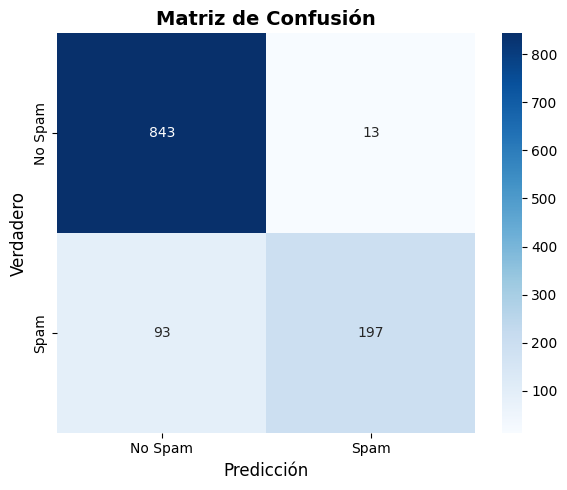

In [ ]:
## Ploteamos bonita la matriz de confusión
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

labels = ['No Spam', 'Spam']

# Código para hacer un heatmap (Matriz de confusión con escala de color)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Verdadero', fontsize=12)
plt.title('Matriz de Confusión', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


#### Pregunta: Los valores parecen ser relativamente buenos:

* Se clasifica correctamente el 91% de los correos (Accuracy)

¿Por qué no debería fiarme del accuracy solamente?

Por otra parte

* se detecta el 69 % de los correos spam reales, es decir, 31% de falsos negativos (Recall)

* f1-score es razonablemente bueno, pero refleja que el modelo tiene problemas para detectar todos los spam.


**Respuesta: Porque el dataset es posible que tenga desbalance de clases.**

In [ ]:
cantidad_ham = data['spam'].value_counts()[0]
cantidad_spam = data['spam'].value_counts()[1]

print(f"Cantidad de correos ham: {cantidad_ham}")
print(f"Cantidad de correos spam: {cantidad_spam}")

Cantidad de correos ham: 4360
Cantidad de correos spam: 1368
